#  SET 2

### Bahador Amjadi
### Matricula:  

### important: *please use the data source which is included in the zip file*

In [1]:
library(ggplot2)
library(pracma)

ERROR: Error in library(pracma): there is no package called 'pracma'


## Exercise 1

In [370]:
E.value <- function(x,p) {return(sum(x*p)) }  #a function that calculates the expected value
VAR     <- function(x,p) {return(E.value((x-E.value(x, p))**2, p))}  #a function that calculates variance

x  <- c(15.58, 15.9, 16,16.1, 16.2  )
p1 <- c(0.15, 15.9,  16,  16.1, 16.2)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [371]:
cat("Excepted Value of x for p1 is", E.value(x,p1), "\nVariance of x for p1 is",VAR(x,E.value(x,p1)))
cat('\n\n')
cat("Excepted Value of x for p2 is", E.value(x,p2), "\nVariance of x for p2 is",VAR(x,E.value(x,p2)))

Excepted Value of x for p1 is 1032.797 
Variance of x for p1 is 3.50457e+13

Excepted Value of x for p2 is 15.9622 
Variance of x for p2 is 126207306

## Exercise 2

In [372]:
options(repr.plot.width=4, repr.plot.height =2.5)  #changing size of plots

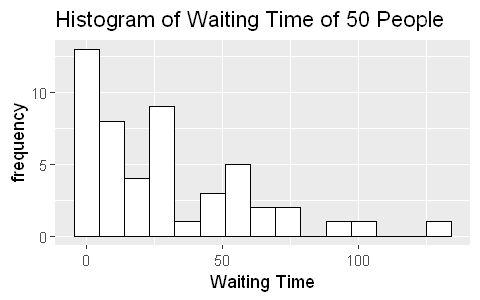

In [373]:
set.seed(1234)
#part A
rate = 1/30
N    = 50
df <- data.frame(person = seq(1,N) , time = rexp(N, rate))

ggplot(df, aes(x=time)) + 
    geom_histogram(color="black", fill="white", bins=15) +
    labs(title = "Histogram of Waiting Time of 50 People",
    x = "Waiting Time",
    y = "frequency")

In [374]:
#These functions calculate the probability of x be more/less than a threshold
prob.more.than <- function(x,threshold){return (length(x[x > threshold])/length(x))}
prob.less.than <- function(x,threshold){return (length(x[x < threshold])/length(x))}

In [375]:
#Part B
prob <- prob.less.than(df$time, 10)
cat ("The probability of waiting less than 10 minutes is", prob)

The probability of waiting less than 10 minutes is 0.32

In [376]:
#Part C
avg.value <- mean(df$time)
cat("The average waiting time in minutes is", avg.value)
#calculating the expected value?????

The average waiting time in minutes is 29.67523

In [377]:
#part D
prob <- prob.more.than(df$time, 60)
cat ("The probability of waiting more than 1 hour is", prob)

The probability of waiting more than 1 hour is 0.14

## Exercise 3

In [378]:
#This fucntion finds the normalization constant of a given x
# norm.const <- function(x){return(x/sum(x))}
norm.const <- function(x,a,b){return(1/integrate(x, a, b)$value)}

The probability that there is at least 1 error in a specific page is 0.04462492

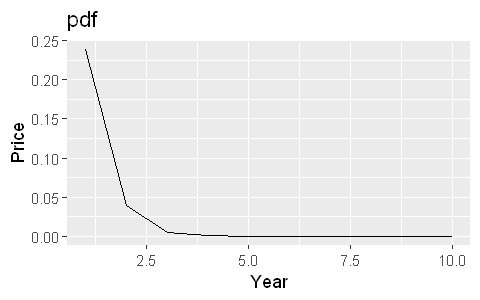

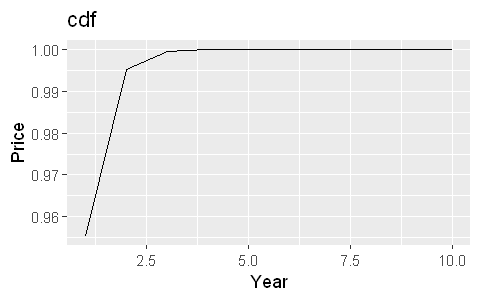

In [380]:
lambda = 1/3
N      = 10
df <- data.frame(no.errors = 1:N , error.pdf = dpois(1:N, lambda), error.cdf = ppois(1:N, lambda))

prob <- ppois(1, lambda=1/3, lower=FALSE)
cat("The probability that there is at least 1 error in a specific page is", prob)
#pdf
ggplot(data = df, aes(x =no.errors , y = error.pdf)) +
    labs(title = "pdf",
    x = "Year",
    y = "Price") +
    geom_line(color='black', lwd=0.55)
#cdf
ggplot(data = df, aes(x =no.errors , y = error.cdf)) +
    labs(title = "cdf",
    x = "Year",
    y = "Price") +
    geom_line(color='black', lwd=0.55)

## Exercise 4

In [12]:
#There are 4 aces among 52 cards
#We should run the exeriment for N times and plot the distribution of the number at which an ace was drawn

N= 100000
deck      <- rep(0, 48)       # 0 : non-ace cards
deck      <- append(deck, rep(1,4))        # 1 : ace     cards
ace.found.at <- vector()

for (i in seq(1,N)){
ace.found <- FALSE
counter <- 1
while (ace.found == FALSE){
sample <- sample(deck,1,replace=TRUE)
if (sample != 1){
counter = counter + 1
} else {
ace.found = TRUE
ace.found.at <- append(ace.found.at, counter)
}}}

df <- data.frame(ace.found.at = ace.found.at)

The probability we would need at least 10 tries to draw the ace 0.44759

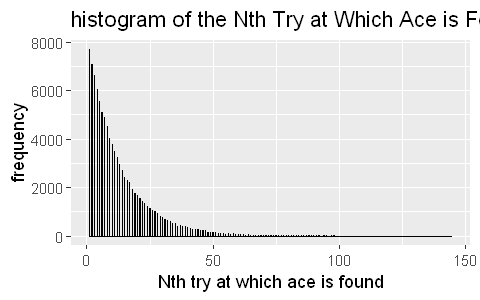

In [13]:
ggplot(df, aes(x=ace.found.at)) + 
    geom_histogram(color="black", fill="white", bins=2000) +
    labs(title = "histogram of the Nth Try at Which Ace is Found",
    x = "Nth try at which ace is found",
    y = "frequency")

prob <- prob.more.than(ace.found.at, 10)
# prob <- length(ace.found.at[ace.found.at > 10])/length(ace.found.at)
cat("The probability we would need at least 10 tries to draw the ace", prob)

## Exercise 5

In [397]:
#part A
dens.func <- function(t){(t-1)*(2-t)}
c <- norm.const(dens.func, 1,2)  #normalization constant
cat("The normalization constant is", c)
norm.dens.func <- function(t){6* (t-1)*(2-t)}

The normalization constant is 6

#### p for "probability", the cumulative distribution function (c. d. f.)
#### q for "quantile", the inverse c. d. f.
#### d for "density", the density function (p. f. or p. d. f.)
#### r for "random", a random variable having the specified distribution

In [25]:
# install.packages("GoFKernel")
library(GoFKernel) #for finding the inverse

In [398]:
#part B, Writing set of four functions

X    <- seq(1,2,0.01)
DF   <- data.frame(X=X)  #َ dataframe to store all the variables
#pdf
dfunc <- function(f){
    pdf <- vector()
    for (x in X){pdf <- append(pdf, f(x))}
    DF$PDF <<- pdf}   #using global assignment operator

#cdf
pfunc    <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    cdf <- vector()
    for (x in X){cdf <- append(cdf, cdf.func(x))}
    DF$CDF <<- cdf}

#quantile
qfunc  <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    quantile.func <- inverse(cdf.func, lower = 0, upper = 1)
    q <- vector()
    for (x in X){q <- append(q, quantile.func(x))}
    DF$Quantile <<- q}

#random
rfunc <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    quantile.func <- inverse(cdf.func, lower = 0, upper = 1)
    X <- runif(101,0,1)
    r <- vector()
    for (x in X){r <- append(r, quantile.func(x))}
    DF$Random <<- r}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [399]:
#Running all the four functions and storing their output in DF
dfunc(norm.dens.func)
pfunc(norm.dens.func)
qfunc(norm.dens.func)
rfunc(norm.dens.func)

In [400]:
head(DF)

X,PDF,CDF,Quantile,Random
1.00,0.0000,0.000000,0.5000000,0.5207757
1.01,0.0594,0.000298,0.4977843,0.5251916
1.02,0.1176,0.001184,0.4955830,0.6521022
1.03,0.1746,0.002646,0.4933930,0.5682510
1.04,0.2304,0.004672,0.4912156,0.7936804
1.05,0.2850,0.007250,0.4890507,0.7202553


In [ ]:
#Plotting the stored values

In [385]:
#part C
#since we are provided with the analytic function we use integration for this part
norm.dens.func <- function(t){c*(t-1)*(2-t)}

#prob of finishing in more than 75 minutes:
prob <- integrate(norm.dens.func, 1.25, 2)$value
cat("The probability that the student will finish the test in more than 75 minutes is", prob)
cat("\n")
#prob of finishing between 90 and 120 minutes 
prob <- integrate(norm.dens.func, 1.5, 2)$value
cat("The probability that the student will finish the test between 90 and 120 minutes is", prob)

The probability that the student will finish the test in more than 75 minutes is 0.84375
The probability that the student will finish the test between 90 and 120 minutes is 0.5

## Exercise 6

In [395]:
#part A

#let's normalize the pdf
c <- (1/integrate(dens.func, 1, 2)$value)
norm.dens.func <- function(x){return(c*10000*(2/(x**2)))}

X    <- seq(1,2,0.01)
DF   <- data.frame(X=X)  #َ dataframe to store all the variables

dfunc(norm.dens.func)
pfunc(norm.dens.func)
# Warning: The other two functions lead to a divergant integral, therefore are not included here
# qfunc(norm.dens.func)
# rfunc(norm.dens.func)

head(DF)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

X,PDF,CDF
1.00,120000.0,0.000
1.01,117635.5,1188.119
1.02,115340.3,2352.941
1.03,113111.5,3495.146
1.04,110946.7,4615.385
1.05,108843.5,5714.286


In [396]:
#part B
#prob that tire last less than 15000 km:
prob <- integrate(norm.dens.func, 1, 1.5)$value
cat("The probability that the tire will last less than 15000km is", prob)

The probability that the tire will last less than 15000km is 40000

In [394]:
#part C
N= 3000
samples <- runif(N) + 1    #generating uniform random numbers between 1 and 2
probs <- dens.func(samples)
probs <- probs/sum(probs)  #normalizing the probabilites

cat("The mean value of x is", E.value(samples, probs))
cat("\n")
cat("The variance of x is",  VAR(samples, probs))

The mean value of x is 1.500699
The variance of x is 0.04889193